In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
filepath = '../../../Project/data/'

In [18]:
recidivism_df = pd.read_csv(filepath + 'recidivism_dataset.csv')

In [19]:
recidivism_df.head()

,Unnamed: 0,ID_VARIABLE,NEW_DOS,NEW_DOF,PRS,NEW_INC_SANCTION_EXISTS,ADJ_JPMIN,AT_RISK_DT,COUNTY,NEXT_DOF,TIME_TO_RECIDIVATE,RECIDIVISM_3Y,RECIDIVISM_5Y,OGS,DOB,OFF_RACE,OFF_SEX
0,0,1000001,2010-02-18,2009-06-25,0,Y,16.0,2010-03-06,Schuylkill,NaN,NaN,0,0,3.0,1990-05-28,White,M
1,1,1000002,2017-01-31,2015-09-01,4,Y,120.0,2017-05-31,Somerset,NaN,NaN,0,0,3.0,1958-07-12,White,F
2,2,1000003,2002-05-08,2001-09-07,0,N,0.0,2002-05-08,Northampton,2009-03-04,2492.0,0,0,3.0,1961-08-14,White,F
3,3,1000003,2009-03-04,2009-03-04,3,Y,92.0,2009-06-04,Northampton,NaN,NaN,0,0,3.0,1961-08-14,White,F
4,4,1000004,2013-12-10,2013-09-19,0,N,0.0,2013-12-10,Franklin,2018-07-09,1672.0,0,1,1.0,1993-09-21,Unknown,M


In [20]:
recidivism_df['NEW_DOF'] = pd.to_datetime(recidivism_df['NEW_DOF'])
recidivism_df['NEW_DOS'] = pd.to_datetime(recidivism_df['NEW_DOS'])

In [118]:
recidivism_df['NEXT_DOF'] = pd.to_datetime(recidivism_df['NEXT_DOF'])

### Time to Conviction Analysis

In [21]:
time_to_conviction = recidivism_df['NEW_DOS'] - recidivism_df['NEW_DOF']

In [22]:
time_to_conviction.describe()

count                        1118542
mean     358 days 19:58:06.812654332
std      375 days 10:05:50.195467544
min                  0 days 00:00:00
25%                164 days 00:00:00
50%                255 days 00:00:00
75%                415 days 00:00:00
max               7993 days 00:00:00
dtype: object

In [188]:
sns.set_style(style='white') 
#palette = ['#9398f2', '#F29398',  '#ffcf6f']
palette = ['#7B86BD', '#FFE347', '#F07B46', '#9EE493' ]
# #EF767A' 7B86BD purple  EF7B45
sns.set_palette(palette)
#label_color = '#242728'

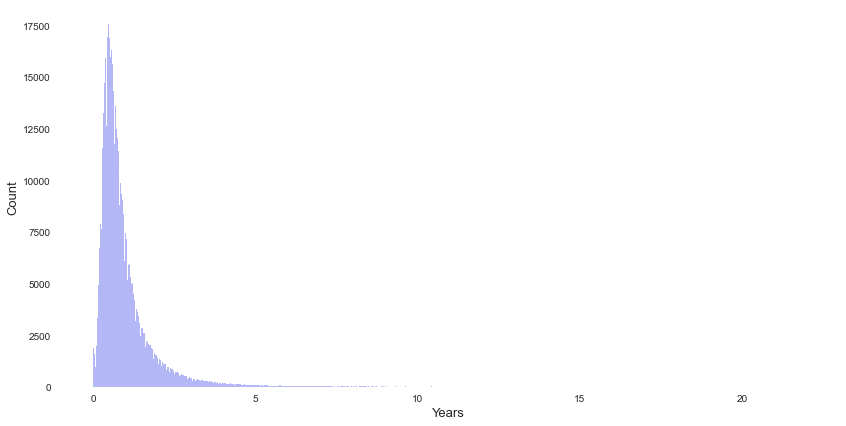

In [63]:
fig, ax = plt.subplots(figsize=(14, 7))

p = sns.histplot(time_to_conviction.dt.days/365,  ax=ax)
sns.despine(top=True, right=True, left=True, bottom=True)
#p.set_title('# of Years Between DOF and DOS', fontsize=16)
p.set_ylabel('Count', fontsize=13)
p.set_xlabel('Years', fontsize=13)
plt.show()

### Cohort Analysis

In [97]:
(time_to_conviction.dt.days<=4*365).sum()/len(time_to_conviction)

0.98084291872813

In [66]:
recidivism_df['YOS'] = recidivism_df['NEW_DOS'].dt.year

In [98]:
def create_sentencing_cohorts(x):
    if x <= 2005:
        cohort = '2001-2005'
    elif x <= 2012:
        cohort = '2006-2012'
    elif x <= 2015: 
        cohort = '2013-2015'
    else: 
        return np.nan
    return cohort

In [76]:
recidivism_df['SENTENCING_COHORT'] = recidivism_df['YOS'].apply(lambda x: create_sentencing_cohorts(x))

In [77]:
recidivism_df['PRS'] = recidivism_df['PRS'].str.upper()

In [175]:
recidivism_counts = recidivism_df[['SENTENCING_COHORT', 'PRS', 'RECIDIVISM_3Y']].groupby(by=['PRS', 'SENTENCING_COHORT']).agg({'RECIDIVISM_3Y':'sum'})
total_counts = recidivism_df[['SENTENCING_COHORT', 'PRS', 'RECIDIVISM_3Y']].groupby(by=['PRS', 'SENTENCING_COHORT']).agg({'RECIDIVISM_3Y':'count'})
recidivism_pct = recidivism_counts.div(total_counts).reset_index()

In [176]:
recidivism_df.groupby(by='SENTENCING_COHORT')['RECIDIVISM_3Y'].count()/len(recidivism_df)

SENTENCING_COHORT
2001-2005    0.231085
2006-2012    0.401250
2013-2015    0.218202
Name: RECIDIVISM_3Y, dtype: float64

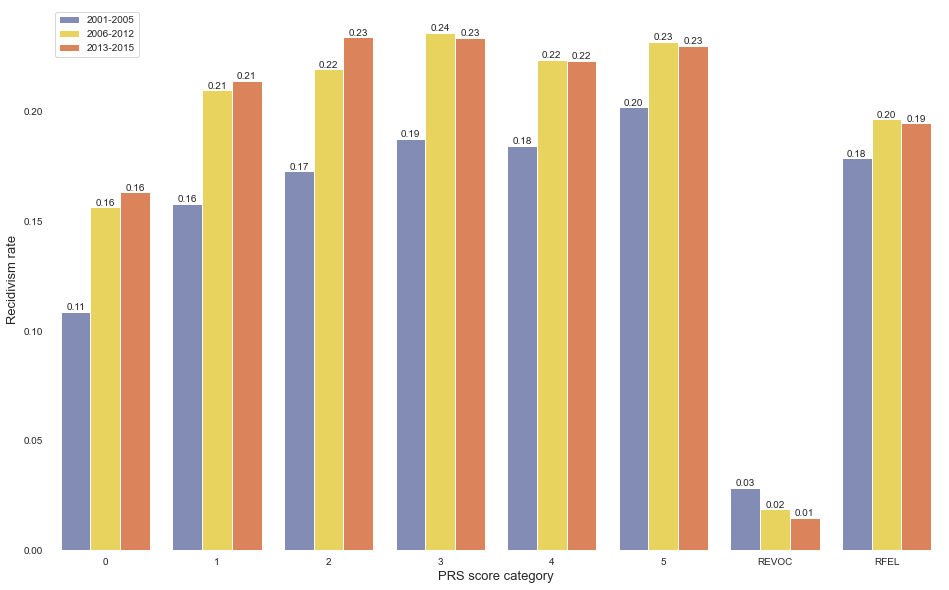

In [189]:
fig, ax = plt.subplots(figsize=(16, 10))
p = sns.barplot(x='PRS', y='RECIDIVISM_3Y', hue='SENTENCING_COHORT', data=recidivism_pct,  ax=ax)
sns.despine(top=True, right=True, left=True, bottom=True)
p.set_xlabel('PRS score category', fontsize=13)
p.set_ylabel('Recidivism rate', fontsize=13)
#.set_title('Recidivism Rate by PRS Categories by Sentencing Cohort', fontsize=14)
ax.legend(loc='upper left')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%1.2f')
ax.bar_label(ax.containers[1], label_type='edge', fmt='%1.2f')
ax.bar_label(ax.containers[2], label_type='edge', fmt='%1.2f')

plt.show()

In [94]:
recidivism_df.drop(columns='Unnamed: 0', inplace=True)

In [99]:
recidivism_df.to_csv(filepath + 'recidivism_dataset_v1.csv', index=False)

### Offense category/severity analysis

In [257]:
offense_df = pd.read_csv(filepath + 'PSC_data_trimmed_v1.csv')

In [ ]:
ofn_label_vars = ['JPR_ID', 'ID_VARIABLE', 'DOS', 'DOF', 'OFN_LABEL', 'LABEL', 'OGS']
offense_df = offense_df[ofn_label_vars].copy()

In [ ]:
offense_df['DOS'] = pd.to_datetime(offense_df['DOS'])

In [ ]:
offense_df['_DOS'] = offense_df['DOS']
offense_df['DOS'] = offense_df.groupby(by=['ID_VARIABLE', 'JPR_ID'])['DOS'].transform('min')

In [ ]:
offense_df['DOF'] = pd.to_datetime(offense_df['DOF'])

In [ ]:
offense_df['_DOF'] = offense_df['DOF']
offense_df['DOF'] = offense_df.groupby(by=['ID_VARIABLE', 'JPR_ID'])['DOF'].transform('min')

In [ ]:
# There are 79 charges with missing LABEL information. replace with OFN_LABEL column
offense_df['LABEL'].fillna(offense_df['OFN_LABEL'], inplace=True)

##### Recidivism to DUI 

In [108]:
offense_df[offense_df['LABEL'].str.contains('DUI')]['LABEL'].unique()

array(['DUI 97-M2', 'DUI 97-M1', 'Homicide-By Veh (No DUI)',
       'Assault-Agg By Veh while DUI', 'Homicide-By Veh while DUI',
       'Homicide-By Veh (DUI)', 'DUI-M2', 'DUI-M1', 'DUI-M',
       'DUI-M1 Minor Occupant', 'DUI-F3',
       'DUI-high rate of alcohol: BAC .10-<.16 (4th/subsq off)',
       'DUI-general impairment: BAC .08-<.10 (4th/subsq off)',
       'Homicide by vehicle while DUI - prior DUI conviction(s)',
       'DUI-controlled substances: metabolite of Sched I/II/III (3rd/subsq off)',
       'DUI-general impairment: BAC .08-<.10 (3rd off)'], dtype=object)

In [109]:
dui_codes =[i for i in offense_df[offense_df['LABEL'].str.contains('DUI')]['LABEL'].unique() if 'No DUI' not in i]

In [110]:
offense_df['DUI'] = offense_df['LABEL'].apply(lambda x: 1 if x in dui_codes else 0)

It is possible that a person commits multiple offenses on a DOF, including DUI and non-DUI related offenses. For now, we will count it as a DUI offense if 1+ charges committed on that day is a DUI.

In [112]:
dui_observations = offense_df[['ID_VARIABLE', 'DOF', 'DUI']].sort_values(by=['ID_VARIABLE', 'DOF', 'DUI'], ascending=[True, True, False]).groupby(by=['ID_VARIABLE', 'DOF']).first().reset_index()

In [114]:
dui_observations.head()

,ID_VARIABLE,DOF,DUI
0,1000001,2009-06-25,0
1,1000002,2015-09-01,1
2,1000003,2001-09-07,0
3,1000003,2009-03-04,0
4,1000004,2013-09-19,0


In [116]:
recidivism_copy = recidivism_df.copy()

In [119]:
recidivism_df = pd.merge(recidivism_df, dui_observations, left_on=['ID_VARIABLE', 'NEXT_DOF'], right_on=['ID_VARIABLE', 'DOF'], how='left')

In [122]:
recidivism_df.rename(columns={'DUI': 'NEXT_OFN_DUI'}, inplace=True)

In [243]:
recidivism_counts = recidivism_df[['NEXT_OFN_DUI', 'PRS', 'RECIDIVISM_3Y']].groupby(by=['PRS', 'NEXT_OFN_DUI']).agg({'RECIDIVISM_3Y':'sum'})
total_counts = recidivism_df[['NEXT_OFN_DUI', 'PRS', 'RECIDIVISM_3Y']].groupby(by=['PRS', 'NEXT_OFN_DUI']).agg({'RECIDIVISM_3Y':'count'})
recidivism_pct = recidivism_counts.div(total_counts).reset_index()

In [244]:
dui_pct = recidivism_df.groupby(by='NEXT_OFN_DUI')['RECIDIVISM_3Y'].sum()/len(recidivism_df[recidivism_df['RECIDIVISM_3Y']==1])

In [245]:
labs = ['DUI', 'non-DUI']
for i in range(2):
    labs[i] = labs[i] + ' {:.1f}'.format(dui_pct.values[i] * 100) + '%'
print(labs)
recidivism_pct['NEXT_OFN_DUI'].replace(to_replace = [0.0, 1.0], value = labs, inplace=True)

['DUI 80.1%', 'non-DUI 19.9%']


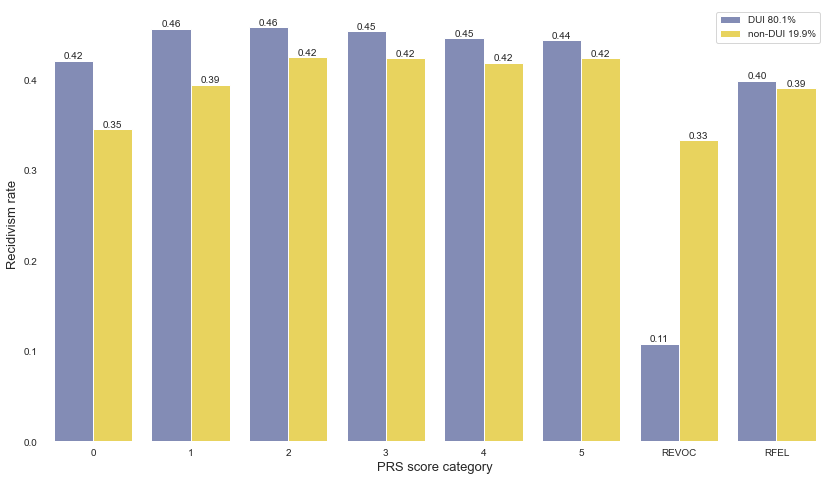

In [246]:
fig, ax = plt.subplots(figsize=(14, 8))
p = sns.barplot(x='PRS', y='RECIDIVISM_3Y', hue='NEXT_OFN_DUI', data=recidivism_pct,  ax=ax)
sns.despine(top=True, right=True, left=True, bottom=True)
p.set_xlabel('PRS score category', fontsize=13)
p.set_ylabel('Recidivism rate', fontsize=13)
ax.legend(loc='upper right')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%1.2f')
ax.bar_label(ax.containers[1], label_type='edge', fmt='%1.2f')

plt.show()

### Recidivate to Felony Offense

A felony is defined as having an OGS >= 5 

In [256]:
ogs = offense_df.groupby(by=['ID_VARIABLE', 'DOF'])['OGS'].max()

,JPR_ID,ID_VARIABLE,DOS,DOF,OFN_LABEL,LABEL,_DOS,_DOF,DUI
0,640001,1904581,2001-06-12,2000-04-01,Corruption of Minors - when of a sexual nature,Corrupting Minor,2001-06-12,2000-04-01,0
1,642480,1157226,2001-12-03,1999-12-31,DUI - M-2,DUI 97-M2,2001-12-03,1999-12-31,1
2,660434,1467650,2001-04-26,2000-12-23,DUI - M-2,DUI 97-M2,2001-04-26,2000-12-23,1
3,628940,1746031,2001-05-22,2000-06-26,Simple Assault,Assault-Simple,2001-05-22,2000-06-26,0
4,594048,1374131,2001-01-03,2000-10-15,DUI - M-1,DUI 97-M1,2001-01-03,2000-10-15,1
...,...,...,...,...,...,...,...,...,...
2593631,5884275,1031522,2019-01-08,2008-03-01,"Theft - Deception; $200 - $2,000",Theft-Misd,2019-01-08,2008-03-01,0
2593632,5583208,1671183,2019-04-08,2015-08-06,Recklessly endangering another person,Assault-Reck Endanger,2019-04-08,2015-08-06,0
2593633,5997828,1491111,2019-04-18,2015-09-30,Theft by unlaw taking-movable property ($200-$...,Theft-Misd,2019-04-18,2015-09-30,0
2593634,6072750,1382936,2019-12-19,2019-04-25,Simple assault-attempt/cause BI,Assault-Simple,2019-12-19,2019-04-25,0


In [255]:
# get OGS score of by ID_VARIABLE and DOF for each individual

ogs_df = offense_df[['ID_VARIABLE', 'DOS', 'DOF', 'OGS']].groupby(by=['ID_VARIABLE', 'JPR_ID']).agg({'DOS': 'min', 'DOF': 'min', 'OGS': 'max'})

KeyError: "['OGS'] not in index"

In [251]:
# check that shift() worked properly
recidivism_df[(recidivism_df['RECIDIVISM_3Y']==1) & (recidivism_df['NEXT_OGS'].isna())][['ID_VARIABLE', 'PRS', 'OGS', 'NEXT_OGS', 'NEW_DOS', 'NEW_DOF']]

,ID_VARIABLE,PRS,OGS,NEXT_OGS,NEW_DOS,NEW_DOF
35,1000021,5,1.0,NaN,2016-05-17,2016-01-25
83,1000057,2,2.0,NaN,2016-12-01,2016-08-20
132,1000098,0,3.0,NaN,2018-01-04,2016-08-08
139,1000102,5,3.0,NaN,2015-08-19,2015-03-01
190,1000142,3,5.0,NaN,2015-09-10,2014-12-06
...,...,...,...,...,...,...
1118296,1916021,2,3.0,NaN,2017-03-06,2015-09-11
1118330,1916046,5,1.0,NaN,2014-11-12,2014-04-12
1118353,1916064,1,3.0,NaN,2018-08-30,2016-01-07
1118419,1916106,0,1.0,NaN,2016-10-18,2015-11-30


In [253]:
recidivism_df[recidivism_df['ID_VARIABLE']==1000021][]

,ID_VARIABLE,NEW_DOS,NEW_DOF,PRS,NEW_INC_SANCTION_EXISTS,ADJ_JPMIN,AT_RISK_DT,COUNTY,NEXT_DOF,TIME_TO_RECIDIVATE,...,RECIDIVISM_5Y,OGS,DOB,OFF_RACE,OFF_SEX,YOS,SENTENCING_COHORT,DOF,NEXT_OFN_DUI,NEXT_OGS
33,1000021,2002-09-20,2001-09-26,0,Y,547.0,2004-03-20,Lancaster,2007-09-03,1262.0,...,1,9.0,1981-12-05,White,M,2002,2001-2005,2007-09-03,0.0,5.0
34,1000021,2010-05-12,2007-09-03,0,Y,276.0,2011-02-12,Lancaster,2016-01-25,1808.0,...,1,5.0,1981-12-05,White,M,2010,2006-2012,2016-01-25,0.0,1.0
35,1000021,2016-05-17,2016-01-25,5,N,0.0,2016-05-17,Lancaster,2017-01-13,241.0,...,1,1.0,1981-12-05,White,M,2016,NaN,2017-01-13,0.0,NaN


In [254]:
offense_df[offense_df['ID_VARIABLE']==1000021]

,JPR_ID,ID_VARIABLE,DOS,DOF,OFN_LABEL,LABEL,_DOS,_DOF,DUI
171008,2585275,1000021,2002-09-20,2001-09-26,Robbery - Commit/Threaten any F1 or F2,Robbery-F1 (SBI),2002-09-20,2001-09-26,0
171009,2585275,1000021,2002-09-20,2001-09-26,Robbery - Commit/Threaten any F1 or F2,Robbery-F1 (SBI),2002-09-20,2001-09-26,0
1259853,4930899,1000021,2010-05-12,2007-09-03,"Theft - Receiving Stolen Property; > $2,000 - ...",Theft-Felony,2010-05-12,2007-09-03,0
2114450,5662291,1000021,2016-05-17,2016-01-25,Harassment-subject other to physical contact (...,Other Misdemeanor,2016-05-17,2016-01-25,0
2114451,5662291,1000021,2016-05-17,2016-01-25,Harassment-repeated communication: other,Stalking/Harrassment,2016-05-17,2016-01-25,0
2254417,5787682,1000021,2017-04-13,2017-01-13,Simple assault-attempt/cause BI,Assault-Simple,2017-04-13,2017-01-13,0
